<a href="https://colab.research.google.com/github/nirajbasyal/Image-recognition-using-cnn-/blob/master/Iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Iris Species

##Classify iris plants into three species in this classic dataset

**Importing libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Importing dataset**

In [0]:
iris=pd.read_csv('Iris.csv')

In [0]:
iris.columns=iris.columns.str.lower()

In [81]:
iris.describe()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Valuecount of class**

In [82]:
iris['species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

Observation : This is balanced data set while checking count above
  

In [0]:
iris=iris.drop('id',axis=1)

In [84]:
iris.head(4)

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


##Data visualization

Exploratory data analysis

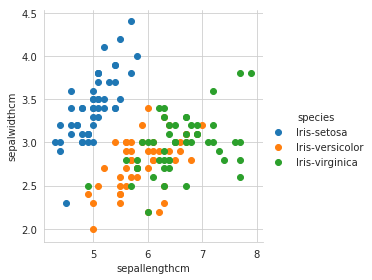

In [85]:
#scatter plot

sns.set_style('whitegrid');
sns.FacetGrid(iris,hue='species',height=4)\
   .map(plt.scatter,'sepallengthcm','sepalwidthcm')\
   .add_legend();

**Observation**


1) Using sepallengthcm and sepalwidthcm features, we can distinguish Setosa flowers from others.

2) Seperating Versicolor from Viginica is much harder  as  they have considerable overlap

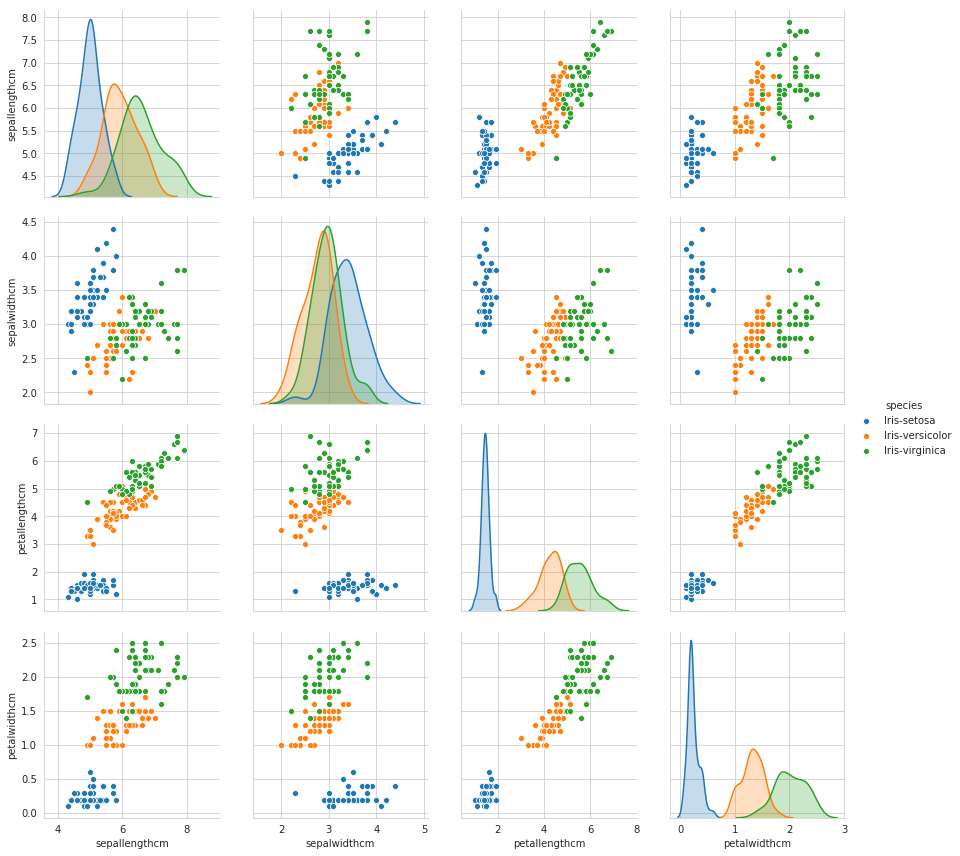

In [86]:
#pair plot

plt.close();
sns.set_style('whitegrid');
sns.pairplot(iris,hue='species',height=3)

**Observation**

1) petallengthcm and petalwidthcm are the most useful features to identify various flower types.

2) While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some
overlap(almost linearly seperable).


**Changing categorical class into numerical label**

In [0]:
iris['species']=iris['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

#Machine Learning Modeling

In [0]:
#seperating Features and label as X and y
X = iris.iloc[:, [0,1,2,3]].values
y = iris.iloc[:, 4].values

**Spliting data into train test split**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

##Applying KNN

**Training KNN Model**

Test set Accuracy at k= 1 :  0.9333333333333333
Test set Accuracy at k= 2 :  0.9333333333333333
Test set Accuracy at k= 3 :  0.9666666666666667
Test set Accuracy at k= 4 :  0.9666666666666667
Test set Accuracy at k= 5 :  0.9666666666666667
Test set Accuracy at k= 6 :  0.9666666666666667
Test set Accuracy at k= 7 :  0.9666666666666667
Test set Accuracy at k= 8 :  0.9666666666666667
Test set Accuracy at k= 9 :  0.9666666666666667


Text(0, 0.5, 'Testing Accuracy')

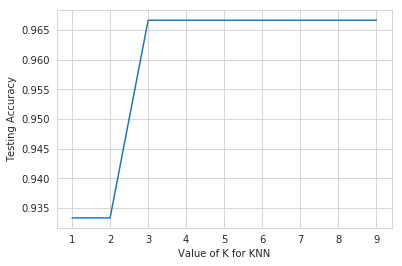

In [90]:
# finding a suitable k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

k_range = range(1, 10)
accuracy = []
for k in k_range:
    KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    # perform the test
    knn_yhat = KNN.predict(X_test)
    print("Test set Accuracy at k=", k, ": ", accuracy_score(y_test, knn_yhat))
    accuracy.append(accuracy_score(y_test, knn_yhat))

# plot the relationship between K and testing accuracy
plt.plot(k_range, accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

**Let's take best value for k= 3**

In [91]:
# Now building model by taking k= 3
KNN = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Testing KNN Model**

In [0]:
y_pred = KNN.predict(X_test)

In [100]:
y_pred

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [101]:
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

## Testing accuracy

In [99]:
accuracy_score(y_test, y_pred)

0.9666666666666667